In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2\train\Knife\-0.jpg
C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2\train\Knife\-1.jpg
C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2\train\Knife\-10.jpg
C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2\train\Knife\-100.jpg
C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2\train\Knife\-101.jpg
C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2\train\Knife\-102.jpg
C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2\train\Knife\-103.jpg
C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2\train\Knife\-104.jpg
C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2\train\Knife\-105.jpg
C:/Use

In [11]:
import tensorflow as tf
import os

In [12]:
train_dir = os.path.join('C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2/train')
val_dir = os.path.join('C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2/val')

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#preprocessing trainingset
train_datagen = ImageDataGenerator(

    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'

)
training_set = train_datagen.flow_from_directory(
    
    train_dir,
    target_size = (64,64),
    batch_size = 4,
    class_mode = 'binary'
)

Found 3665 images belonging to 2 classes.


In [14]:
#preprocessing testset

test_datagen = ImageDataGenerator(

    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)
test_set = test_datagen.flow_from_directory(
    
    val_dir,
    target_size = (64,64),
    batch_size = 4,
    class_mode = 'binary'
)

Found 25 images belonging to 2 classes.


In [15]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
#membuat model jarigan saraf tiruan
#model yg digunakan = sequential
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#Adding 2nd Convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
#Adding 2nd Convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
#STEP 3: FLATTENING
cnn.add(tf.keras.layers.Flatten())
#STEP 4: FULL CONNECTION
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#STEP 5: OUTPUT LAYER
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [25]:
#compile model dengan 'adam'
#Compiling the CNN
import scipy
from scipy import stats
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
917/917 [==============================] - 19s 20ms/step - loss: 0.0696 - accuracy: 0.9771 - val_loss: 0.5929 - val_accuracy: 0.6800
Epoch 2/50
917/917 [==============================] - 16s 17ms/step - loss: 0.0665 - accuracy: 0.9771 - val_loss: 0.5317 - val_accuracy: 0.8400
Epoch 3/50
917/917 [==============================] - 16s 17ms/step - loss: 0.0551 - accuracy: 0.9795 - val_loss: 0.4647 - val_accuracy: 0.7600
Epoch 4/50
917/917 [==============================] - 16s 17ms/step - loss: 0.0595 - accuracy: 0.9784 - val_loss: 0.8850 - val_accuracy: 0.6400
Epoch 5/50
917/917 [==============================] - 16s 17ms/step - loss: 0.0612 - accuracy: 0.9787 - val_loss: 0.8141 - val_accuracy: 0.7600
Epoch 6/50
917/917 [==============================] - 16s 17ms/step - loss: 0.0544 - accuracy: 0.9809 - val_loss: 1.4027 - val_accuracy: 0.6400
Epoch 7/50
917/917 [==============================] - 17s 18ms/step - loss: 0.0570 - accuracy: 0.9798 - val_loss: 1.0555 - val_accuracy:

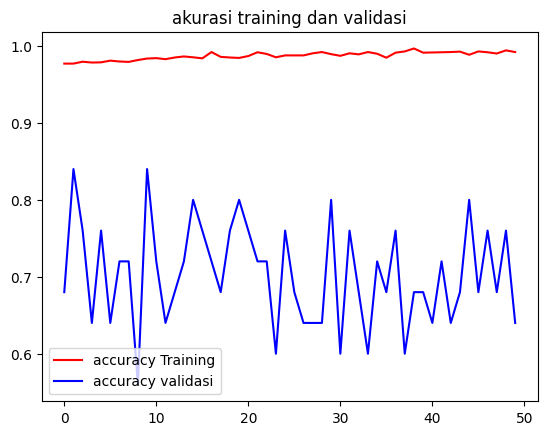

<Figure size 640x480 with 0 Axes>

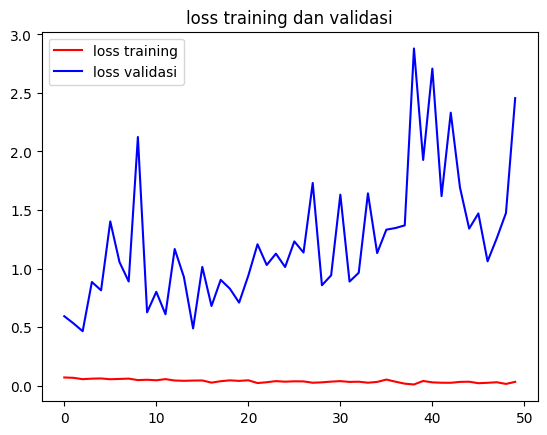

<Figure size 640x480 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'accuracy Training') # 훈련데이터 정확도
plt.plot(epochs, val_acc,'b',label='accuracy validasi') # 검증데이터 정확도 높을수록 좋음
plt.title('akurasi training dan validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label = 'loss training') # 훈련 데이터 손실
plt.plot(epochs, val_loss,'b',label='loss validasi') # 검증 데이터 손실 둘다 낮을수록 좋음
plt.title('loss training dan validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

1/1 [==============================] - 0s 20ms/step


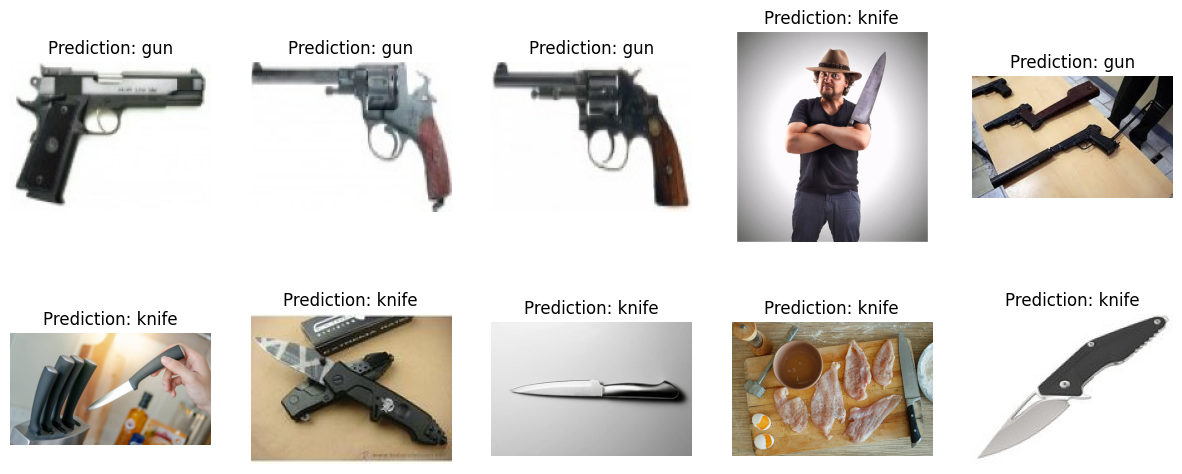

In [22]:
from keras.preprocessing import image
import random
import os


# 'C:/Users/Jounghyoun/Downloads/Knife_vs_Pistol2/train/Pistol/' 경로에 있는 파일 목록을 가져오기
pistol_files = os.listdir('C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2/train/Pistol/')

# 'C:/Users/Jounghyoun/Downloads/Knife_vs_Pistol2/train/Knife/' 경로에 있는 파일 목록을 가져오기
knife_files = os.listdir('C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2/train/Knife/')

# 10장의 이미지를 무작위로 선택하기
random_image_files = random.sample(pistol_files + knife_files, 10)

# 그리드에 이미지 그리기
plt.figure(figsize=(15, 6))

for i, image_file in enumerate(random_image_files):
    image_path = os.path.join('C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2/train/Pistol/' if image_file in pistol_files else 'C:/Users/COMPUTER/Desktop/Python04_ML_DL_Android_project/jupyterNotebook/Knife_vs_Pistol2/train/Knife/', image_file)
    test_image = image.load_img(image_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = cnn.predict(test_image)
    
    if result[0][0] == 1:
        prediction = 'gun'
    else:
        prediction = 'knife'

    plt.subplot(2, 5, i + 1)
    plt.imshow(plt.imread(image_path))
    plt.title(f'Prediction: {prediction}')
    plt.axis('off')

plt.show()


In [23]:
converter = tf.lite.TFLiteConverter.from_keras_model(cnn)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpnqo9aie3\assets


INFO:tensorflow:Assets written to: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpnqo9aie3\assets


In [24]:
with open('./cnnKnife1.tflite', 'wb') as f:
    f.write(tflite_model)